In [1]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
print("training data point====>",len(train_data))
print("testing data points====>",len(test_data))

training data point====> 404
testing data points====> 102


In [4]:
print(train_data.shape)
print(test_data.shape)
#13 features

(404, 13)
(102, 13)


In [5]:
print(train_data)

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


In [6]:
#feature-wise normalization: 
print("before normilization")
print(train_data)
mean = train_data.mean(axis=0) 
train_data -= mean
std = train_data.std(axis=0) 
train_data /= std
test_data -= mean 
test_data /= std
print("after")
print(train_data)

before normilization
[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
after
[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.

In [7]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64, activation='relu',
  input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
  return model

In [38]:
#K-fold validation
k=4
num_val_samples = len(train_data) // k 
# print(num_val_samples)
num_epochs = 100
all_scores = []
all_mae_histories = []
print("after multiple")
# print(train_data[1*num_val_samples:(1+1)*num_val_samples])
print(train_data[1:10])

after multiple
[[-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
  -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  -0.25683275  0.62864202 -1.82968811
   1.11048828 -1.18743907  1.67588577  1.5652875   0.78447637  0.22061726
  -1.30850006]
 [-0.40149354 -0.48361547 -0.86940196 -0.25683275 -0.3615597  -0.3245576
  -1.23667187  1.10717989 -0.51114231 -1.094663    0.78447637  0.44807713
  -0.65292624]
 [-0.0056343  -0.48361547  1.0283258  -0.25683275  1.32861221  0.15364225
   0.69480801 -0.57857203  1.67588577  1.5652875   0.78447637  0.3898823
   0.26349695]
 [-0.37502238 -0.48361547 -0.54747912 -0.25683275 -0.54935658 -0.78865126
   0.18954148  0.48371503 -0.51114231 -0.71552978  0.51145832  0.38669063
  -0.13812828]
 [ 0.58963463 -0.48361547  1.0283258  -0.25683275  1.21764133 -1.03127774
   1.11048828 -1.06518235  1.67588577  1.5652875   0.78447637  0.44807713
   1.49873604]
 [ 0.0381

In [39]:
for i in range(k):
  print('processing fold #', i+1)
  # make the folds of data points 
  # simple slicing of original data 
  # first from k=[0:101] k=[101:202] and so on
  l_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]

  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  print("picking data points from ==>","[",i * num_val_samples,(i + 1) * num_val_samples,"]")
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples], 
  train_data[(i + 1) * num_val_samples:]],
  axis=0)
  print("shape of partial data===>",len(partial_train_data))
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples], 
  train_targets[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model()
  #save history 
  history = model.fit(partial_train_data, partial_train_targets,
                                                                  validation_data=(val_data, val_targets), 
  epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 1
picking data points from ==> [ 0 101 ]
shape of partial data===> 303
processing fold # 2
picking data points from ==> [ 101 202 ]
shape of partial data===> 303
processing fold # 3
picking data points from ==> [ 202 303 ]
shape of partial data===> 303
processing fold # 4
picking data points from ==> [ 303 404 ]
shape of partial data===> 303


In [40]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

###########simple loops #####

# for i in range(num_epochs):
#   for x in all_mae_histories:
#     print(np.mean(x[i]))
    
average_mae_history

[4.5774834752082825,
 3.366093695163727,
 3.078710913658142,
 2.8868905305862427,
 2.8104668259620667,
 2.7340750098228455,
 2.695561707019806,
 2.8305659890174866,
 2.608887255191803,
 2.6649394631385803,
 2.4966453909873962,
 2.5149911642074585,
 2.484138786792755,
 2.654656946659088,
 2.5162892937660217,
 2.366157740354538,
 2.5253041982650757,
 2.5433560609817505,
 2.362915575504303,
 2.4017087817192078,
 2.403900682926178,
 2.4650229811668396,
 2.4868013858795166,
 2.4238241314888,
 2.380039393901825,
 2.4139857292175293,
 2.6535908579826355,
 2.350806772708893,
 2.4017279744148254,
 2.375669538974762,
 2.3356005549430847,
 2.3959012031555176,
 2.3490048944950104,
 2.244969457387924,
 2.35337033867836,
 2.340932071208954,
 2.391518235206604,
 2.2934526205062866,
 2.2878545820713043,
 2.375750243663788,
 2.400167405605316,
 2.5237702131271362,
 2.4119818806648254,
 2.2689933478832245,
 2.3282892405986786,
 2.364932596683502,
 2.3149100244045258,
 2.3147449791431427,
 2.387040078639

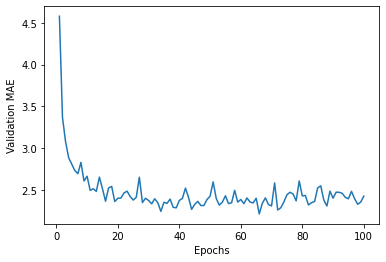

In [41]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()